       max      min      mean        sd       rms  skewness  kurtosis  \
0  0.35986 -0.41890  0.017840  0.122746  0.124006 -0.118571 -0.042219   
1  0.46772 -0.36111  0.022255  0.132488  0.134312  0.174699 -0.081548   
2  0.46855 -0.43809  0.020470  0.149651  0.151008  0.040339 -0.274069   
3  0.58475 -0.54303  0.020960  0.157067  0.158422 -0.023266  0.134692   
4  0.44685 -0.57891  0.022167  0.138189  0.139922 -0.081534  0.402783   

      crest      form       fault  
0  2.901946  6.950855  Ball_007_1  
1  3.482334  6.035202  Ball_007_1  
2  3.102819  7.376926  Ball_007_1  
3  3.691097  7.558387  Ball_007_1  
4  3.193561  6.312085  Ball_007_1  
Class Mapping: {'Ball_007_1': 0, 'Ball_014_1': 1, 'Ball_021_1': 2, 'IR_007_1': 3, 'IR_014_1': 4, 'IR_021_1': 5, 'Normal_1': 6, 'OR_007_6_1': 7, 'OR_014_6_1': 8, 'OR_021_6_1': 9}

--- Classification Results ---
Accuracy: 0.967391304347826
Confusion Matrix:
 [[43  0  0  0  0  0  0  0  3  0]
 [ 1 47  1  0  0  0  0  0  1  0]
 [ 2  1 44  0  0  2  0

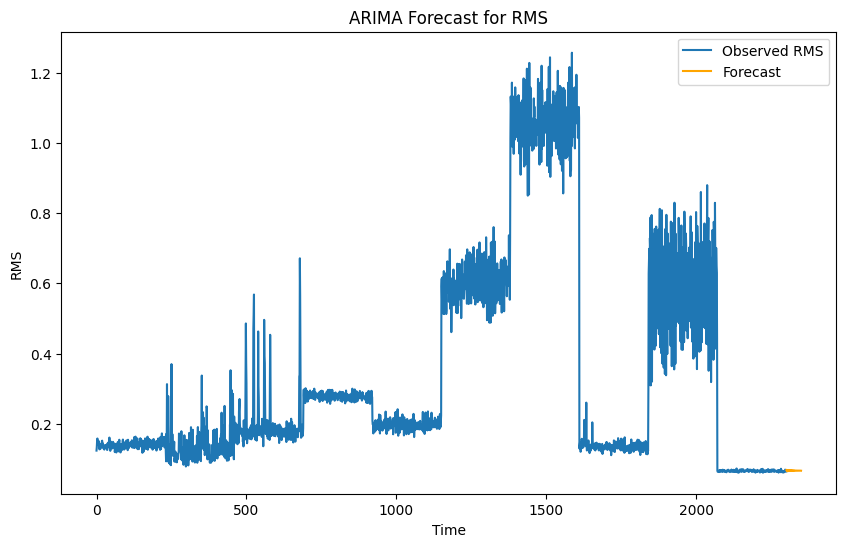

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("feature_time_48k_2048_load_1.csv")

# Inspect the dataset
print(data.head())

# Define features and target
features = ['max', 'min', 'mean', 'sd', 'rms', 'skewness', 'kurtosis', 'crest', 'form']

# Handle the 'fault' column (categorical labels)
# 1. Label Encoding for Classification
label_encoder = LabelEncoder()
data['fault_encoded'] = label_encoder.fit_transform(data['fault'])
print("Class Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# 2. Derive RUL for Regression (based on defect size/type)
def get_rul_from_fault(fault_label):
    if "Ball_007" in fault_label:
        return 1000  # Small defect size -> longer life
    elif "Ball_014" in fault_label:
        return 500   # Medium defect size -> medium life
    elif "Ball_021" in fault_label:
        return 100   # Large defect size -> shorter life
    return 0  # Default or unknown

data['RUL'] = data['fault'].apply(get_rul_from_fault)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

# CLASSIFICATION TASK: Fault Type Prediction
# Prepare the data
y_classification = data['fault_encoded']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Predict and Evaluate Classification
y_pred_clf = clf.predict(X_test_clf)
print("\n--- Classification Results ---")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))

# REGRESSION TASK: RUL Prediction
# Prepare the data
y_regression = data['RUL']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_reg, y_train_reg)

# Predict and Evaluate Regression
y_pred_reg = reg.predict(X_test_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print("\n--- Regression Results ---")
print("RMSE:", rmse)
print("True vs Predicted RUL (first 10 samples):")
print("True:", y_test_reg.values[:10])
print("Predicted:", y_pred_reg[:10])

# BONUS: Time-Series Analysis (ARIMA Example)
from statsmodels.tsa.arima.model import ARIMA

# Select a feature to analyze trends (e.g., RMS)
rms_series = data['rms']
rms_series.index = range(len(rms_series))  # Ensure a proper index for time-series analysis

# Fit ARIMA model
arima_model = ARIMA(rms_series, order=(5, 1, 0))  # Adjust (p, d, q) as needed
arima_fit = arima_model.fit()
forecast = arima_fit.forecast(steps=50)  # Forecast 50 future points

# Plot the original series and forecast
plt.figure(figsize=(10, 6))
plt.plot(rms_series, label='Observed RMS')
plt.plot(range(len(rms_series), len(rms_series) + 50), forecast, label='Forecast', color='orange')
plt.legend()
plt.title("ARIMA Forecast for RMS")
plt.xlabel("Time")
plt.ylabel("RMS")
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Load dataset
file_path = "feature_time_48k_2048_load_1.csv"  # Update if needed
df = pd.read_csv(file_path)

# Extract feature columns (excluding the label)
feature_columns = df.columns[:-1]  # All except last column

# Generate synthetic data using Gaussian sampling
n_samples = 1000  # Number of simulated data points
simulated_data = {}

for col in feature_columns:
    mean = df[col].mean()
    std = df[col].std()
    simulated_data[col] = np.random.normal(mean, std, n_samples)

# Create DataFrame for simulated data
simulated_df = pd.DataFrame(simulated_data)

# Save the simulated dataset
simulated_df.to_csv("simulated_data.csv", index=False)

# Display first few rows
print(simulated_df.head())


        max       min      mean        sd       rms  skewness  kurtosis  \
0  2.127817 -3.369041  0.018778 -0.085816  0.369972 -0.098939 -5.164718   
1 -0.377351 -3.166168  0.013360  0.398225  0.869006 -0.294856 -3.490665   
2 -1.239668 -1.315245  0.006713  0.506742  0.284401  0.273308 -1.216951   
3  0.691917 -2.472730  0.017331  0.104902  0.390889  0.168493 -1.034282   
4  2.472530 -0.784739  0.019594  0.288829  0.590926 -0.162827 -0.706581   

      crest       form  
0  4.858267 -26.980792  
1  3.716141  27.700932  
2  4.975011  30.812892  
3  6.176837  -5.361633  
4  5.154999  61.677163  


       max      min      mean        sd       rms  skewness  kurtosis  \
0  0.35986 -0.41890  0.017840  0.122746  0.124006 -0.118571 -0.042219   
1  0.46772 -0.36111  0.022255  0.132488  0.134312  0.174699 -0.081548   
2  0.46855 -0.43809  0.020470  0.149651  0.151008  0.040339 -0.274069   
3  0.58475 -0.54303  0.020960  0.157067  0.158422 -0.023266  0.134692   
4  0.44685 -0.57891  0.022167  0.138189  0.139922 -0.081534  0.402783   

      crest      form       fault  
0  2.901946  6.950855  Ball_007_1  
1  3.482334  6.035202  Ball_007_1  
2  3.102819  7.376926  Ball_007_1  
3  3.691097  7.558387  Ball_007_1  
4  3.193561  6.312085  Ball_007_1  
Class Mapping: {'Ball_007_1': 0, 'Ball_014_1': 1, 'Ball_021_1': 2, 'IR_007_1': 3, 'IR_014_1': 4, 'IR_021_1': 5, 'Normal_1': 6, 'OR_007_6_1': 7, 'OR_014_6_1': 8, 'OR_021_6_1': 9}

--- Classification Results ---
Accuracy: 0.967391304347826
Confusion Matrix:
 [[43  0  0  0  0  0  0  0  3  0]
 [ 1 47  1  0  0  0  0  0  1  0]
 [ 2  1 44  0  0  2  0

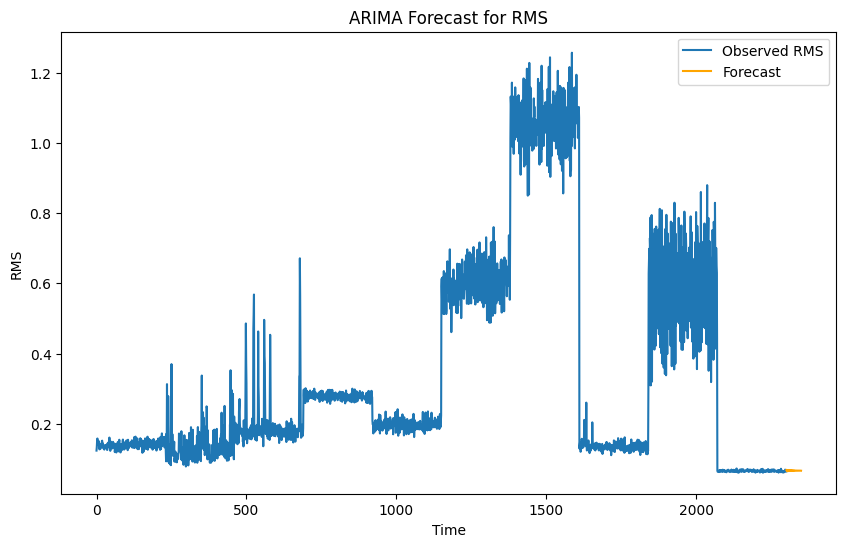

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("feature_time_48k_2048_load_1.csv")

# Inspect the dataset
print(data.head())

# Define features and target
features = ['max', 'min', 'mean', 'sd', 'rms', 'skewness', 'kurtosis', 'crest', 'form']

# Handle the 'fault' column (categorical labels)
# 1. Label Encoding for Classification
label_encoder = LabelEncoder()
data['fault_encoded'] = label_encoder.fit_transform(data['fault'])
print("Class Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# 2. Derive RUL for Regression (based on defect size/type)
def get_rul_from_fault(fault_label):
    if "Ball_007" in fault_label:
        return 1000  # Small defect size -> longer life
    elif "Ball_014" in fault_label:
        return 500   # Medium defect size -> medium life
    elif "Ball_021" in fault_label:
        return 100   # Large defect size -> shorter life
    return 0  # Default or unknown

data['RUL'] = data['fault'].apply(get_rul_from_fault)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

# CLASSIFICATION TASK: Fault Type Prediction
# Prepare the data
y_classification = data['fault_encoded']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Predict and Evaluate Classification
y_pred_clf = clf.predict(X_test_clf)
print("\n--- Classification Results ---")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))

# REGRESSION TASK: RUL Prediction
# Prepare the data
y_regression = data['RUL']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_reg, y_train_reg)

# Predict and Evaluate Regression
y_pred_reg = reg.predict(X_test_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print("\n--- Regression Results ---")
print("RMSE:", rmse)
print("True vs Predicted RUL (first 10 samples):")
print("True:", y_test_reg.values[:10])
print("Predicted:", y_pred_reg[:10])

# BONUS: Time-Series Analysis (ARIMA Example)
from statsmodels.tsa.arima.model import ARIMA

# Select a feature to analyze trends (e.g., RMS)
rms_series = data['rms']
rms_series.index = range(len(rms_series))  # Ensure a proper index for time-series analysis

# Fit ARIMA model
arima_model = ARIMA(rms_series, order=(5, 1, 0))  # Adjust (p, d, q) as needed
arima_fit = arima_model.fit()
forecast = arima_fit.forecast(steps=50)  # Forecast 50 future points

# Plot the original series and forecast
plt.figure(figsize=(10, 6))
plt.plot(rms_series, label='Observed RMS')
plt.plot(range(len(rms_series), len(rms_series) + 50), forecast, label='Forecast', color='orange')
plt.legend()
plt.title("ARIMA Forecast for RMS")
plt.xlabel("Time")
plt.ylabel("RMS")
plt.show()


In [ ]:
import pickle
with open (f'bearing_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

with open (f'scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open (f'label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [ ]:
data

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault,fault_encoded,RUL
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1,0,1000
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1,0,1000
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1,0,1000
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1,0,1000
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1,6,0
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1,6,0
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1,6,0
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1,6,0


In [ ]:
X_test_reg.shape

(460, 9)

In [ ]:
import numpy as np
import pandas as pd

# Load dataset
file_path = "feature_time_48k_2048_load_1.csv"  # Update if needed
df = pd.read_csv(file_path)

# Features to simulate (excluding labels)
feature_columns = df.columns[:-1]  # Assumes last column is the label
label_column = df.columns[-1]  # Assumes last column is the label

# Number of synthetic samples
n_samples = 1000

# Generate synthetic data using Gaussian distribution (mean & std per column)
simulated_data = {}
for col in feature_columns:
    mean = df[col].mean()
    std = df[col].std()
    simulated_data[col] = np.random.normal(mean, std, n_samples)

# Convert to DataFrame
simulated_df = pd.DataFrame(simulated_data)

# Assign labels by sampling from the original dataset
simulated_df[label_column] = np.random.choice(df[label_column].values, n_samples)

# Save simulated dataset
simulated_df.to_csv("simulated_data.csv", index=False)

# Display first few rows
print(simulated_df.head())


        max       min      mean        sd       rms  skewness   kurtosis  \
0  1.826574 -1.419650  0.015243  0.486429  0.183696  0.123085   0.873500   
1  1.938572 -0.249643  0.011884  0.374161  0.852580 -0.004049   9.314555   
2  2.561527 -2.051953  0.011002 -0.079851  0.368369  0.191160  10.912186   
3  3.885994 -1.719831  0.020042  0.783972  0.087510 -0.146762   7.541115   
4  3.956704 -2.053876  0.012280  1.049512  0.518884  0.020090  -0.875314   

      crest       form       fault  
0  1.485173 -18.007943  Ball_014_1  
1  3.416993  80.317133    IR_007_1  
2  4.508022  11.181813  Ball_014_1  
3  3.748507  34.133800  OR_007_6_1  
4  3.963001  29.204673    IR_021_1  


In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "feature_time_48k_2048_load_1.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Features and label columns
feature_columns = df.columns[:-1]  # All except last column
label_column = df.columns[-1]  # Last column is the label

# Encode labels as numeric values
label_mapping = {label: idx for idx, label in enumerate(df[label_column].unique())}
df["label_numeric"] = df[label_column].map(label_mapping)

# Standardize features for better GMM clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_columns])

# Train a Gaussian Mixture Model (GMM)
n_components = len(df[label_column].unique())  # Set GMM components to match label count
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(scaled_features)

# Generate synthetic data using Gaussian sampling
n_samples = 1000
simulated_data = {}
for col in feature_columns:
    mean = df[col].mean()
    std = df[col].std()
    simulated_data[col] = np.random.normal(mean, std, n_samples)

simulated_df = pd.DataFrame(simulated_data)

# Standardize synthetic data before predicting labels
scaled_simulated = scaler.transform(simulated_df)
simulated_labels = gmm.predict(scaled_simulated)

# Convert numeric labels back to original labels
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
simulated_df[label_column] = [reverse_label_mapping[label] for label in simulated_labels]

# Save simulated dataset
simulated_df.to_csv("simulated_data_gmm.csv", index=False)

# Display first few rows
print(simulated_df.head())


        max       min      mean        sd       rms  skewness  kurtosis  \
0  0.701421 -1.205797  0.015035  0.235973  0.550974 -0.031835  6.852530   
1  1.183969 -1.787746  0.015786 -0.052745  0.027256 -0.067265 -6.510345   
2  0.910081  0.989736  0.016445  0.430586  0.205587  0.363071  2.164751   
3 -1.778319 -1.501119  0.013227  0.746820  0.338200 -0.032307  2.211531   
4  2.617931 -3.532636  0.014818  0.397177 -0.066280 -0.111920  2.966581   

      crest       form     fault  
0  4.797453 -32.179249  IR_007_1  
1  3.102233  -5.461309  IR_007_1  
2  4.882938  37.304266  IR_007_1  
3  3.694576  26.986370  IR_007_1  
4  2.588064  33.866167  IR_007_1  


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

# Load dataset
file_path = "feature_time_48k_2048_load_1.csv"  # Update if needed
df = pd.read_csv(file_path)

# Features and label columns
feature_columns = df.columns[:-1]  # All except last column
label_column = df.columns[-1]  # Last column is the label

# Encode labels as numeric values
label_mapping = {label: idx for idx, label in enumerate(df[label_column].unique())}
df["label_numeric"] = df[label_column].map(label_mapping)

# Standardize features for better clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_columns])

# Train a K-Means model
n_clusters = len(df[label_column].unique())  # Match number of unique labels
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(scaled_features)

# Map K-Means clusters to actual labels based on majority voting
cluster_to_label = {}
for cluster in range(n_clusters):
    cluster_labels = df[df["cluster"] == cluster]["label_numeric"]
    if not cluster_labels.empty:  # Ensure cluster is not empty
        most_common_label = mode(cluster_labels.values, keepdims=True).mode[0]  # FIXED INDEX ERROR
        cluster_to_label[cluster] = most_common_label

# Generate synthetic data using Gaussian sampling
n_samples = 1000
simulated_data = {}
for col in feature_columns:
    mean = df[col].mean()
    std = df[col].std()
    simulated_data[col] = np.random.normal(mean, std, n_samples)

simulated_df = pd.DataFrame(simulated_data)

# Standardize synthetic data before predicting clusters
scaled_simulated = scaler.transform(simulated_df)
simulated_clusters = kmeans.predict(scaled_simulated)

# Assign labels based on cluster mapping
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
simulated_df[label_column] = [
    reverse_label_mapping[cluster_to_label.get(c, list(reverse_label_mapping.values())[0])]  # Default to first label if missing
    for c in simulated_clusters
]

# Save the simulated dataset
simulated_df.to_csv("simulated_data_kmeans.csv", index=False)

# Display first few rows
print(simulated_df.head())


        max       min      mean        sd       rms  skewness  kurtosis  \
0  2.150136 -0.094136  0.023130  0.483508  0.695889 -0.004614 -0.698376   
1  3.307045 -1.211545  0.017370  0.592655  0.108818 -0.222570  5.849832   
2  1.123345 -0.492272  0.013240  0.312274  0.693111 -0.070337 -1.100925   
3  3.064635 -3.494348  0.006238  0.082199  0.307565 -0.242728  2.189131   
4  1.182649 -0.443963  0.015867  0.933014  0.018772 -0.197363  2.805899   

      crest       form     fault  
0  5.099849   1.870514  IR_007_1  
1  4.190995   1.253547  IR_007_1  
2  5.773967  77.974959  IR_021_1  
3  1.950179  34.975939  IR_021_1  
4  3.486640   7.690770  IR_007_1  


In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

# User uploads a CSV file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the uploaded file name

# Load the dataset
df = pd.read_csv(file_name)

# Check if the dataset has any columns
if df.empty:
    raise ValueError("The uploaded CSV file is empty or invalid.")

# Extract feature columns (assuming no labels are present)
feature_columns = df.columns

# Determine the number of synthetic samples (50% more than the original data)
n_samples = int(0.5 * len(df))

# Generate synthetic data using Gaussian distribution
simulated_data = {}
for col in feature_columns:
    mean = df[col].mean()
    std = df[col].std()
    simulated_data[col] = np.random.normal(mean, std, n_samples)

# Convert to DataFrame
simulated_df = pd.DataFrame(simulated_data)

# Append simulated data to the original dataset
augmented_df = pd.concat([df, simulated_df], ignore_index=True)

# Save the new dataset
new_file_name = "augmented_data.csv"
augmented_df.to_csv(new_file_name, index=False)

# Display first few rows
print(f"New dataset saved as {new_file_name}")
print(augmented_df.head())

# Provide download link
files.download(new_file_name)


Saving bearings_features.csv to bearings_features.csv
New dataset saved as augmented_data.csv
       max      min      mean        sd       rms  skewness  kurtosis  \
0  0.35986 -0.41890  0.017840  0.122746  0.124006 -0.118571 -0.042219   
1  0.46772 -0.36111  0.022255  0.132488  0.134312  0.174699 -0.081548   
2  0.46855 -0.43809  0.020470  0.149651  0.151008  0.040339 -0.274069   
3  0.58475 -0.54303  0.020960  0.157067  0.158422 -0.023266  0.134692   
4  0.44685 -0.57891  0.022167  0.138189  0.139922 -0.081534  0.402783   

      crest      form  
0  2.901946  6.950855  
1  3.482334  6.035202  
2  3.102819  7.376926  
3  3.691097  7.558387  
4  3.193561  6.312085  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>